# Customer Personality Analysis

In [18]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [19]:
dataset = pd.read_csv("marketing_campaign.csv",sep = "\t")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [20]:
print("Total number of sum entries: ",dataset.isnull().sum().sum())

Total number of sum entries:  24


In [4]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

### Subsetting Dataset

In [6]:
who_is_customer = dataset[["ID","Year_Birth","Education","Marital_Status","Income","Kidhome","Teenhome","Recency"]]
products = dataset[["ID","Dt_Customer","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]]
customer_campaign = dataset[["ID","NumDealsPurchases","AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5","Response"]]
platforms = dataset[["ID","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"]]
customer_responses = dataset[["ID","Complain","Z_CostContact", "Z_Revenue"]]

# EDA

In [8]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

## Customer Profile

In [9]:
who_is_customer["Age"] = 2022 - who_is_customer["Year_Birth"]
who_is_customer["Age"].describe()

C:\Users\User\AppData\Local\Temp/ipykernel_11544/3280257809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  who_is_customer["Age"] = 2022 - who_is_customer["Year_Birth"]


count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [21]:
who_is_customer.isnull().sum()

ID                 0
Year_Birth         0
Education          0
Marital_Status     0
Income            24
Kidhome            0
Teenhome           0
Recency            0
Age                0
dtype: int64

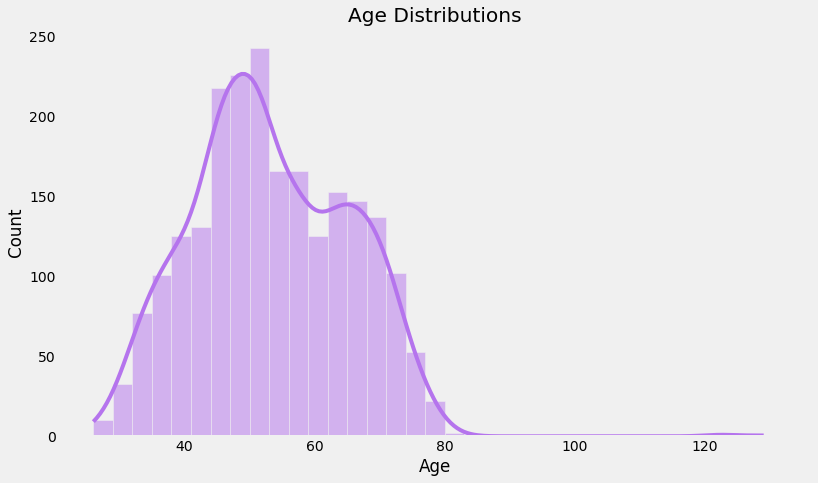

In [11]:
plt.figure(figsize=(12,7))
plt.title("Age Distributions")
sns.histplot(x=who_is_customer["Age"], kde=True, bins="auto", binwidth=3, color="#b574ed")
plt.grid(False)
plt.show()

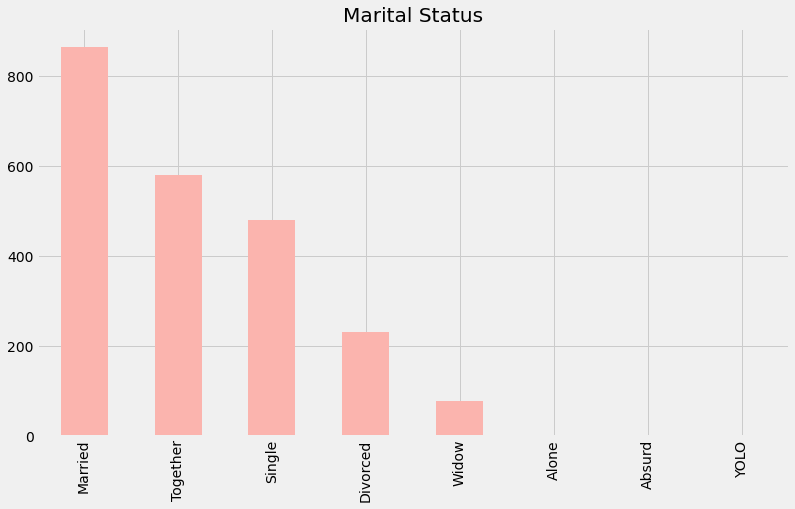

In [22]:
plt.figure(figsize=(12,7))
plt.title("Marital Status")
who_is_customer["Marital_Status"].value_counts().plot(kind="bar", colormap="Pastel1")
plt.show()

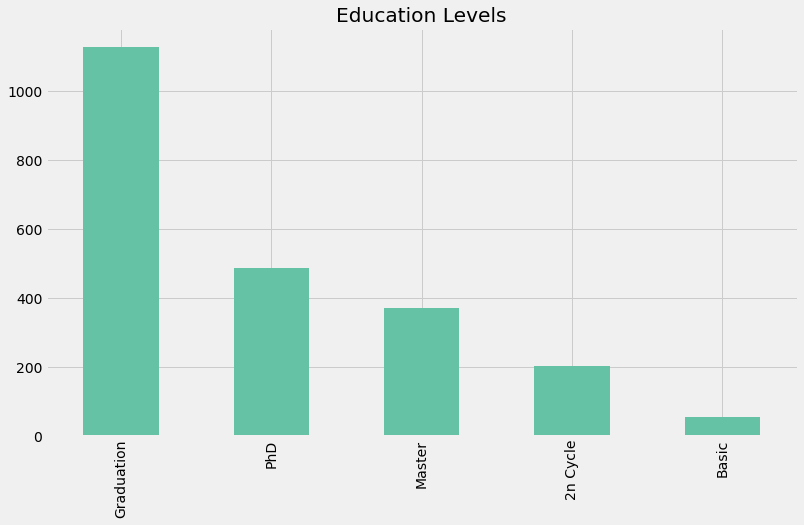

In [23]:
plt.figure(figsize=(12,7))
plt.title("Education Levels")
who_is_customer["Education"].value_counts().plot(kind="bar", colormap="Set2")
plt.show()

In [24]:
who_is_customer["Income"].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

## Store Statistics

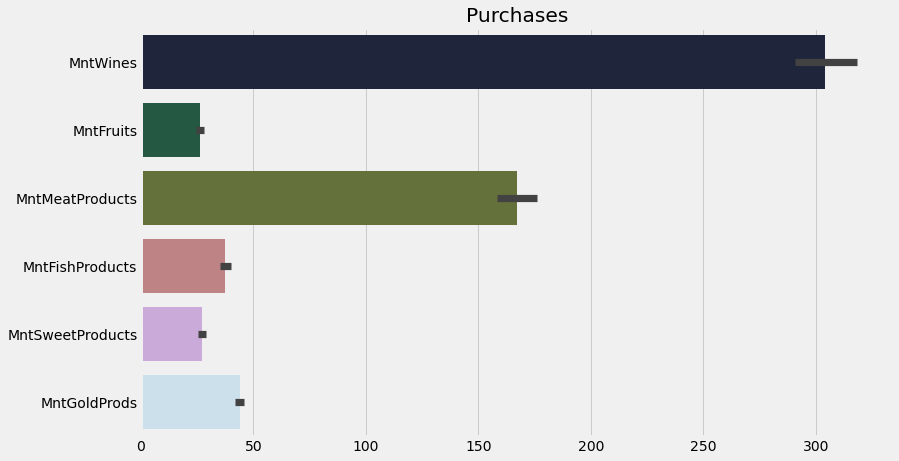

In [14]:
plt.figure(figsize=(12,7))
plt.title("Purchases")
sns.barplot(data=products.drop("ID",axis=1), orient="h", palette="cubehelix")
plt.show()

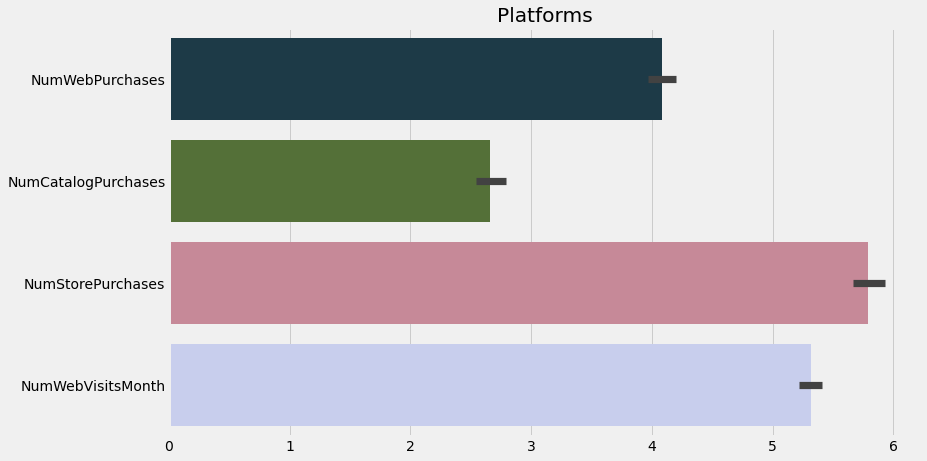

In [15]:
plt.figure(figsize=(12,7))
plt.title("Platforms")
sns.barplot(data=platforms.drop("ID",axis=1), orient="h", palette="cubehelix")
plt.show()

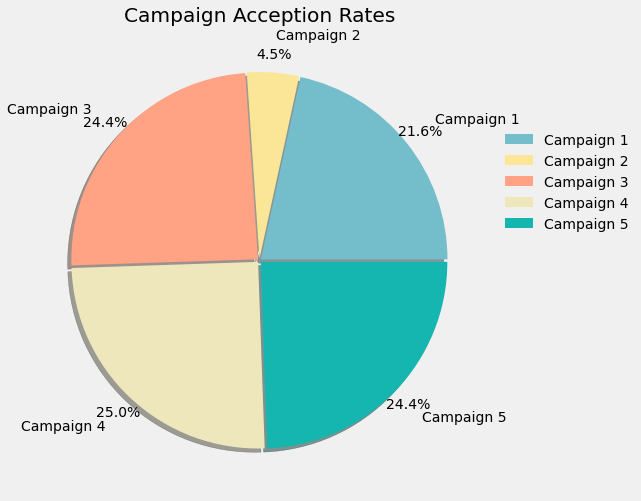

In [16]:
camp1_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp1"] == 1]) / len(dataset)
camp2_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp2"] == 1]) / len(dataset)
camp3_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp3"] == 1]) / len(dataset)
camp4_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp4"] == 1]) / len(dataset)
camp5_rate = 100*len(customer_campaign[customer_campaign["AcceptedCmp5"] == 1]) / len(dataset)

plt.figure(figsize=(10,8))
plt.title("Campaign Acception Rates")
plt.pie([camp1_rate,camp2_rate,camp3_rate,camp4_rate,camp5_rate], labels=["Campaign 1","Campaign 2","Campaign 3","Campaign 4","Campaign 5"],  colors=["#74BDCB","#FBE698","#FFA384","#EFE7BC","#15B5B0"],autopct="%1.1f%%", startangle=0, pctdistance=1.1,labeldistance=1.2, shadow=True, explode=(0.01,0.01,0.01,0.01,0.01))
plt.legend(frameon=False, bbox_to_anchor=(1,0.8))
plt.show()
plt.show()